In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv('house-prices.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [4]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [5]:
print(df['Brick'].value_counts(), "\n")
print(df['Neighborhood'].value_counts(), "\n")
print(df['Offers'].value_counts())

Brick
No     86
Yes    42
Name: count, dtype: int64 

Neighborhood
East     45
North    44
West     39
Name: count, dtype: int64 

Offers
3    46
2    36
1    23
4    19
5     3
6     1
Name: count, dtype: int64


In [6]:
df.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [7]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [8]:
print(df.columns)

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')


In [9]:
# df.isnull().sum()

# either
# df.dropna()

# or
# df.fillna(df.mean())

In [10]:
x = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Train data size : {x_train.shape}")
print(f"Test data size: {x_test.shape}")

Train data size : (102, 3)
Test data size: (26, 3)


In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

# price = c1*SqFt + c2*Beadrooms + c3*Bathrooms + intercept

# here from the output we can say that Bathroom impact the most and SqFt impact less on price

Coefficients:  [   41.44755181 10278.00910207 13090.39118144]
Intercept:  -16372.916362967444


In [13]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

MAE: 14768.459338206885
MSE: 320149938.2302681
R² Score: 0.4568195777548879


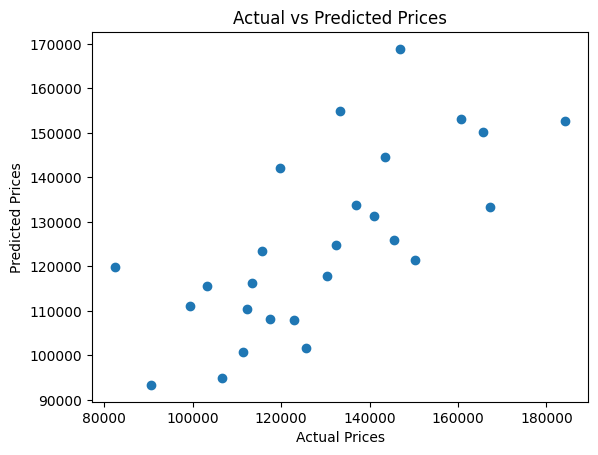

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [17]:
# predict the price

feature_names = ["SqFt", "Bedrooms", "Bathrooms"]
new_house = pd.DataFrame([[2000, 3, 2]], columns=feature_names)
predicted_price = model.predict(new_house)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Predicted Price: $123,537.00
